Notebook for generating figures from FCM simulations: surface temperature, low cloud and precipitation anomalies

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import nctoolkit as nct

import xarray
import proplot as pplt

nctoolkit is using Climate Data Operators version 1.9.9


In [2]:
co2_dir = '/tdat/mdvorak/CMIP6/2xCO2'
pi_dir = '/tdat/mdvorak/CMIP6/tos'
plio_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos'
e_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/SOM'
b_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2'

In [3]:
ts_plio = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.TS.115101-120012.nc' %(plio_dir))
ts_plio_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.TS.035101-040512.nc' %(plio_dir))
ts_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.TS.190001-200012.nc' %(plio_dir))
ts_400 = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.TS.812-902yrs.nc' %(plio_dir))

In [4]:
ice_plio = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.ICEFRAC.115101-120012.nc' %(plio_dir))
ice_plio_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.ICEFRAC.035101-040512.nc' %(plio_dir))
ice_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.ICEFRAC.190001-200012.nc' %(plio_dir))
ice_400 = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.ICEFRAC.812-902yrs.nc' %(plio_dir))

In [5]:
cld_plio = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.CLDLOW.115101-120012.nc' %(plio_dir))
cld_plio_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.CLDLOW.035101-040512.nc' %(plio_dir))
cld_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.CLDLOW.190001-200012.nc' %(plio_dir))
cld_400 = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.CLDLOW.812-902yrs.nc' %(plio_dir))

In [6]:
precip_plio = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.PRECL.115101-120012.nc' %(plio_dir))
precip_plio_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.PRECL.035101-040512.nc' %(plio_dir))
precip_pi = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.PRECL.190001-200012.nc' %(plio_dir))
precip_400 = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.PRECL.812-902yrs.nc' %(plio_dir))

In [8]:
ocnfrac_pi = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.OCNFRAC.34-84yrs.nc' %(e_dir))
ocnfrac_plio = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.OCNFRAC.76-126yrs.nc' %(e_dir))

In [9]:
def time_weights(ds):
    month_length = ds.time.dt.days_in_month
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xarray.ALL_DIMS), 1.0)
    
    return wgts

In [10]:
def lat_weights(ds):
    clat = np.cos(np.deg2rad(ds.lat)) 
    return clat / np.sum(clat) 

In [11]:
# mask = xarray.open_dataset('/tdat/mdvorak/CMIP6/Pliocene/domain.lnd.fv0.9_1.25_gx1v6plioenh.190801.nc')
# mask['ni'] = mask.mask.xc[0,:]
# mask['nj'] = mask.mask.yc[:,0]

# mask = mask.rename(ni='lon',nj='lat')

e_dir2 = '/tdat/mdvorak/CMIP6/Pliocene/tos/CESM1.2/SOM'

pi_mask = xarray.open_dataset('%s/domain.ocn.gx1v6.090206_latlon.nc' %(e_dir2))
mask = xarray.open_dataset('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM1.2/SOM/Pliocene_mask.nc')

In [12]:
import cmocean
cmaps = cmocean.cm.cmap_d

In [22]:
print(ts_plio_diff.weighted(lat_weights(ts_plio)).mean(("lat","lon")))

<xarray.DataArray 'TS' ()>
array(5.12451206)


In [21]:
ts_plio_diff = ts_plio.TS.mean('time') - ts_pi.TS.mean('time')

In [ ]:
sst_plio = ts_plio.TS.weighted(time_weights(ts_plio)).mean('time')
sst_plio = sst_plio.where(sst_plio > 271.35, 271.35)
sst_plio = sst_plio.where(ocnfrac_plio.OCNFRAC.mean('time') > 0)

sst_plio_pi = ts_plio_pi.TS.weighted(time_weights(ts_plio_pi)).mean('time')
sst_plio_pi = sst_plio_pi.where(sst_plio_pi > 271.35, 271.35)
sst_plio_pi = sst_plio_pi.where(ocnfrac_plio.OCNFRAC.mean('time') > 0)

sst_400 = ts_400.TS.weighted(time_weights(ts_400)).mean('time')
sst_400 = sst_400.where(sst_400 > 271.35, 271.35)
sst_400 = sst_400.where(ocnfrac_pi.OCNFRAC.mean('time'))

sst_pi = ts_pi.TS.weighted(time_weights(ts_pi)).mean('time')
sst_pi = sst_pi.where(sst_pi > 271.35, 271.35)
sst_pi = sst_pi.where(ocnfrac_pi.OCNFRAC.mean('time'))

sst_plio_diff = (sst_plio - sst_pi)
#sst_plio_diff = sst_plio_diff.where(sst_plio_diff > -4)


sst_plio_pi_diff = (sst_plio_pi - sst_pi)
#sst_plio_pi_diff = sst_plio_pi_diff.where(sst_plio_pi_diff > -4)


sst_400_diff = (sst_400 - sst_pi)

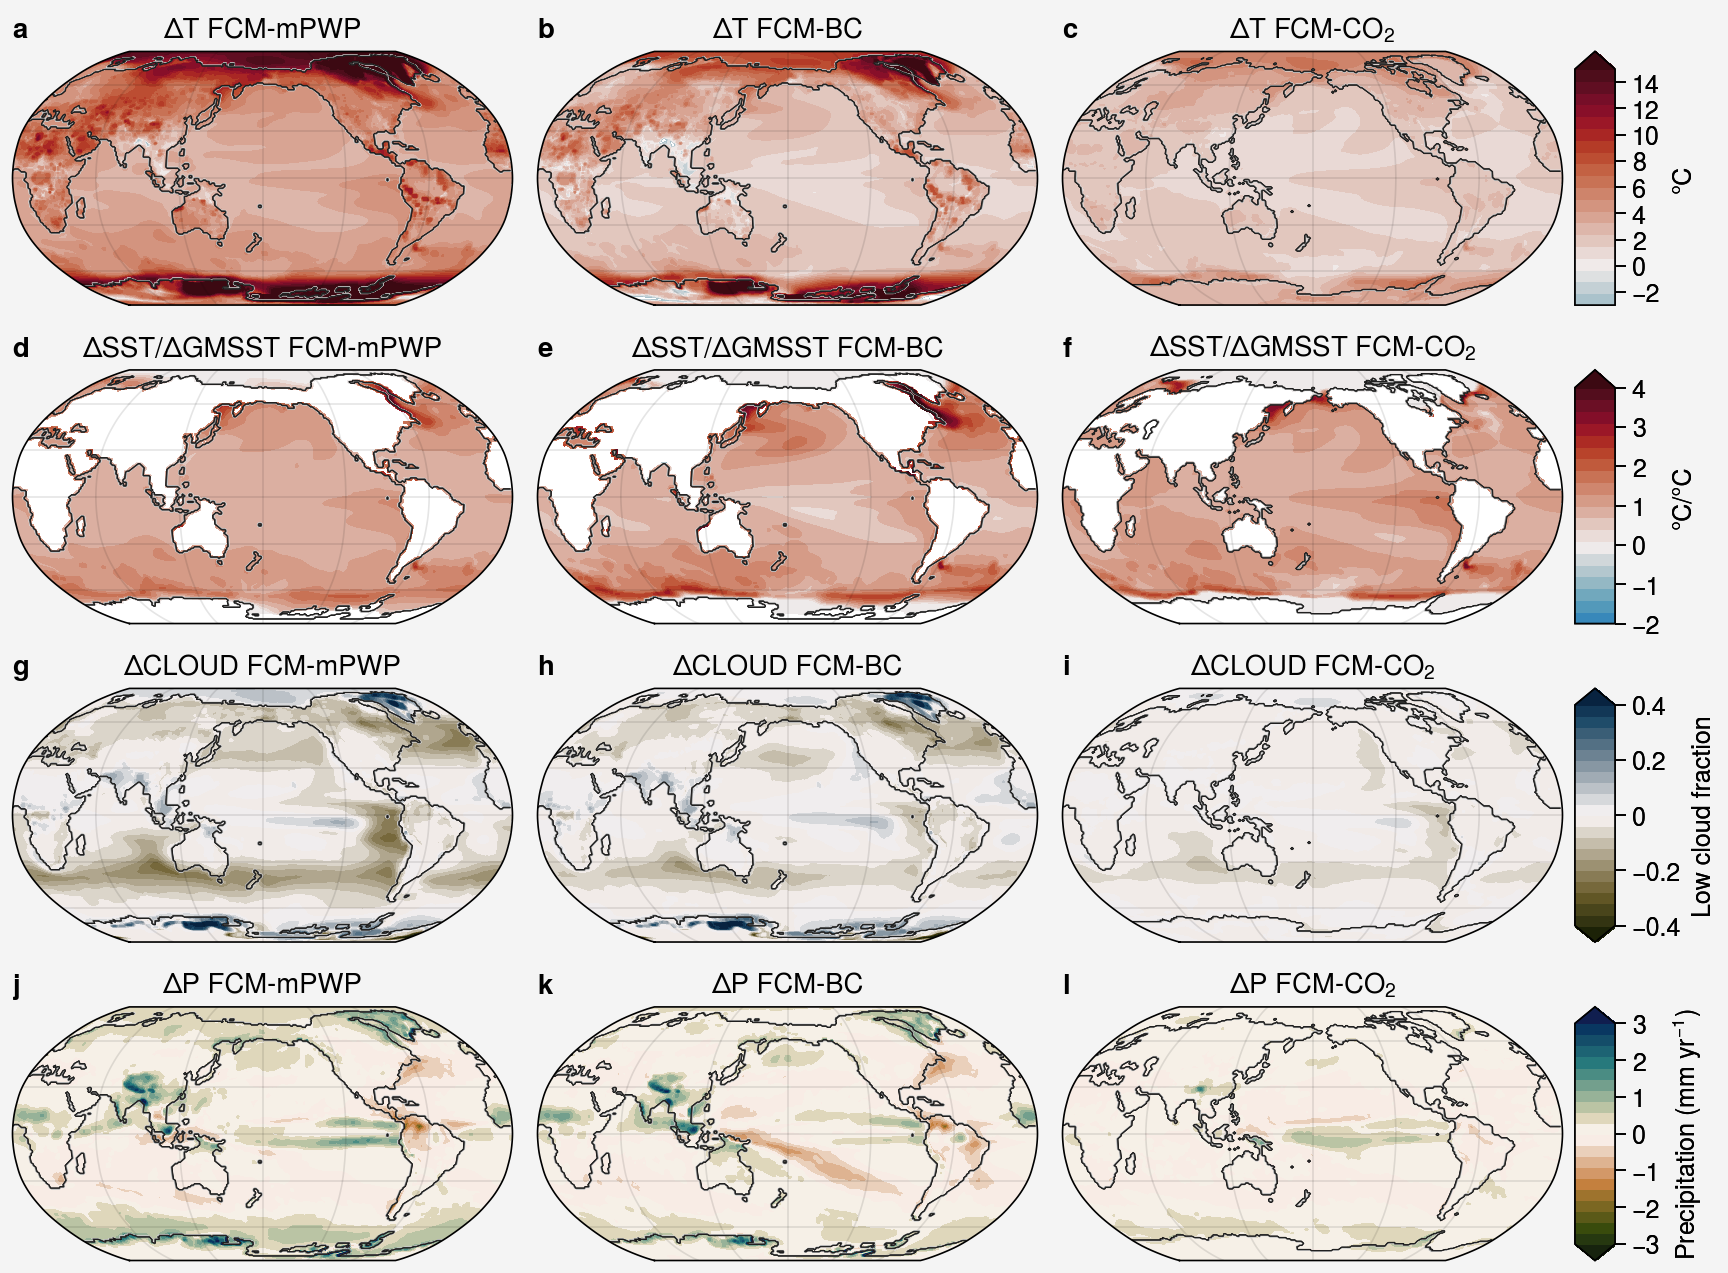

In [15]:
fig, axes = pplt.subplots(ncols=3, nrows=4, proj='robin', proj_kw={'lon_0': 180})

ts_plio_diff = ts_plio.TS.weighted(time_weights(ts_plio)).mean('time') - ts_pi.TS.weighted(time_weights(ts_pi)).mean('time')
ts_plio_pidiff = ts_plio_pi.TS.weighted(time_weights(ts_plio_pi)).mean('time') - ts_pi.TS.weighted(time_weights(ts_pi)).mean('time')
ts_co2_diff = ts_400.TS.weighted(time_weights(ts_400)).mean('time') - ts_pi.TS.weighted(time_weights(ts_pi)).mean('time')

cld_plio_diff = cld_plio.CLDLOW.weighted(time_weights(cld_plio)).mean('time') - cld_pi.CLDLOW.weighted(time_weights(cld_pi)).mean('time')
cld_plio_pidiff = cld_plio_pi.CLDLOW.weighted(time_weights(cld_plio_pi)).mean('time') - cld_pi.CLDLOW.weighted(time_weights(cld_pi)).mean('time')
cld_co2_diff = cld_400.CLDLOW.weighted(time_weights(cld_400)).mean('time') - cld_pi.CLDLOW.weighted(time_weights(cld_pi)).mean('time')

precip_plio_diff = precip_plio.PRECL.weighted(time_weights(precip_plio)).mean('time') * 1e3 * 86400 - precip_pi.PRECL.weighted(time_weights(precip_pi)).mean('time') * 1e3 * 86400
precip_plio_pidiff = precip_plio_pi.PRECL.weighted(time_weights(precip_plio_pi)).mean('time') * 1e3 * 86400 - precip_pi.PRECL.weighted(time_weights(precip_pi)).mean('time') * 1e3 * 86400
precip_co2_diff = precip_400.PRECL.weighted(time_weights(precip_400)).mean('time') * 1e3 * 86400 - precip_pi.PRECL.weighted(time_weights(precip_pi)).mean('time') * 1e3 * 86400


cp = axes[0].contourf(ts_plio_diff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')
axes[1].contourf(ts_plio_pidiff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')
axes[2].contourf(ts_co2_diff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')

axes[2].colorbar(cp, ticks=2, label=('°C'))
axes[2].contour(pi_mask.mask, cmap='black', linewidth=0.3)

for ax in axes[:2]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)

cp = axes[3].contourf(sst_plio_diff/(sst_plio_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                      levels=np.linspace(-2,4,21), extend='max', cmap='balance')
axes[4].contourf(sst_plio_pi_diff/(sst_plio_pi_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-2,4,21), extend='max', cmap='balance')

axes[5].contourf(sst_400_diff/(sst_400_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-2,4,21), extend='max', cmap='balance')

axes[5].colorbar(cp, ticks=1, label=('°C/°C'))
axes[5].contour(pi_mask.mask, cmap='black', linewidth=0.3)

for ax in axes[3:5]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
cp = axes[6].contourf(cld_plio_diff, levels=np.linspace(-0.4,0.4,21), extend='both', cmap=cmaps['diff_r'])
axes[7].contourf(cld_plio_pidiff, levels=np.linspace(-0.4,0.4,21), extend='both', cmap=cmaps['diff_r'])
axes[8].contourf(cld_co2_diff, levels=np.linspace(-0.4,0.4,21), extend='both', cmap=cmaps['diff_r'])

for ax in axes[6:8]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[8].contour(pi_mask.mask, cmap='black', linewidth=0.3)
axes[8].colorbar(cp, ticks=0.2, label='Low cloud fraction')

cp = axes[9].contourf(precip_plio_diff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[10].contourf(precip_plio_pidiff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[11].contourf(precip_co2_diff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])

for ax in axes[9:11]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[11].colorbar(cp, ticks=1.0, label='Precipitation (mm yr$^{-1}$)')
axes[11].contour(pi_mask.mask, cmap='black', linewidth=0.3)

axes[0].set_title('\u0394T FCM-mPWP')
axes[1].set_title('\u0394T FCM-BC')
axes[2].set_title('\u0394T FCM-CO$_2$')

axes[3].set_title('\u0394SST/\u0394GMSST FCM-mPWP')
axes[4].set_title('\u0394SST/\u0394GMSST FCM-BC')
axes[5].set_title('\u0394SST/\u0394GMSST FCM-CO$_2$')

axes[6].set_title('\u0394CLOUD FCM-mPWP')
axes[7].set_title('\u0394CLOUD FCM-BC')
axes[8].set_title('\u0394CLOUD FCM-CO$_2$')

axes[9].set_title('\u0394P FCM-mPWP')
axes[10].set_title('\u0394P FCM-BC')
axes[11].set_title('\u0394P FCM-CO$_2$')

fig.format(abc= True);

plt.savefig('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/figures/FCM_figure_wprecip_revised.pdf');

In [26]:
print(ts_plio_diff.weighted(lat_weights(ts_plio_diff)).mean(("lat","lon")),
      ts_plio_pidiff.weighted(lat_weights(ts_plio_pidiff)).mean(("lat","lon")),
      ts_co2_diff.weighted(lat_weights(ts_co2_diff)).mean(("lat","lon")))

<xarray.DataArray 'TS' ()>
array(5.10408248) <xarray.DataArray 'TS' ()>
array(2.85107765) <xarray.DataArray 'TS' ()>
array(2.00941925)


In [ ]:
# load SOM simulation results

e_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/SOM'

e_pi = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))
e_plio = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.TEMP.ICE.FORCING.76-126yrs.nc' %(e_dir))
e_plio_280 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.TEMP.ICE.FORCING.25-75yrs.nc' %(e_dir))
e_co2 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.569.4.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))
e_400 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))

som_weights = np.cos(np.deg2rad(e_pi.lat));

In [ ]:
# SOM precipitation fields

e_pi_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.PRECIP.H2O.34-84yrs.nc' %(e_dir))
e_plio_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.PRECIP.H2O.76-126yrs.nc' %(e_dir))
e_plio_280_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.PRECIP.H2O.25-75yrs.nc' %(e_dir))
e_400_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.PRECIP.H2O.34-84yrs.nc' %(e_dir))

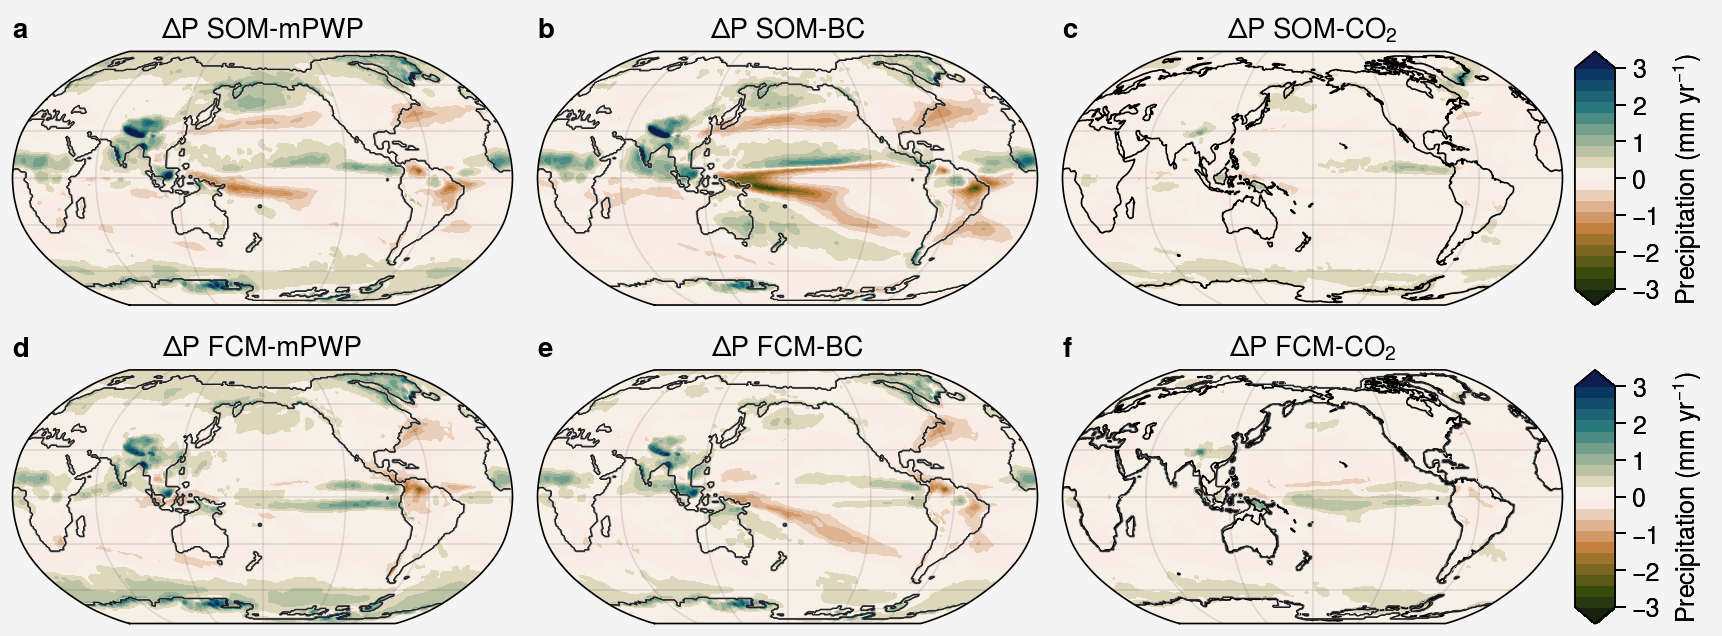

In [15]:
precip_plio_diff = precip_plio.PRECL.weighted(time_weights(precip_plio)).mean('time') * 1e3 * 86400 - precip_pi.PRECL.weighted(time_weights(precip_pi)).mean('time') * 1e3 * 86400
precip_plio_pidiff = precip_plio_pi.PRECL.weighted(time_weights(precip_plio_pi)).mean('time') * 1e3 * 86400 - precip_pi.PRECL.weighted(time_weights(precip_pi)).mean('time') * 1e3 * 86400
precip_co2_diff = precip_400.PRECL.weighted(time_weights(precip_400)).mean('time') * 1e3 * 86400 - precip_pi.PRECL.weighted(time_weights(precip_pi)).mean('time') * 1e3 * 86400

precip_plio_som = e_plio_precip.PRECL.weighted(time_weights(e_plio_precip)).mean('time') * 1e3 * 86400 - e_pi_precip.PRECL.weighted(time_weights(e_pi_precip)).mean('time') * 1e3 * 86400
precip_plio_pisom = e_plio_280_precip.PRECL.weighted(time_weights(e_plio_280_precip)).mean('time') * 1e3 * 86400 - e_pi_precip.PRECL.weighted(time_weights(e_pi_precip)).mean('time') * 1e3 * 86400
precip_co2_som = e_400_precip.PRECL.weighted(time_weights(e_400_precip)).mean('time') * 1e3 * 86400 - e_pi_precip.PRECL.weighted(time_weights(e_pi_precip)).mean('time') * 1e3 * 86400

fig, axes = pplt.subplots(ncols=3, nrows=2, proj='robin', proj_kw={'lon_0': 180})

cp = axes[0].contourf(precip_plio_som, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[1].contourf(precip_plio_pisom, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[2].contourf(precip_co2_som, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])

for ax in axes[0:2]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[2].colorbar(cp, ticks=1.0, label='Precipitation (mm yr$^{-1}$)')
axes[2].coastlines()

cp = axes[3].contourf(precip_plio_diff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[4].contourf(precip_plio_pidiff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[5].contourf(precip_co2_diff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])

for ax in axes[3:]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[5].colorbar(cp, ticks=1.0, label='Precipitation (mm yr$^{-1}$)')
axes[5].coastlines()

axes[0].set_title('\u0394P SOM-mPWP')
axes[1].set_title('\u0394P SOM-BC')
axes[2].set_title('\u0394P SOM-CO$_2$')

axes[3].set_title('\u0394P FCM-mPWP')
axes[4].set_title('\u0394P FCM-BC')
axes[5].set_title('\u0394P FCM-CO$_2$')

axes.format(abc=True)
plt.savefig('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/figures/Supp_precip.pdf');